In [1]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

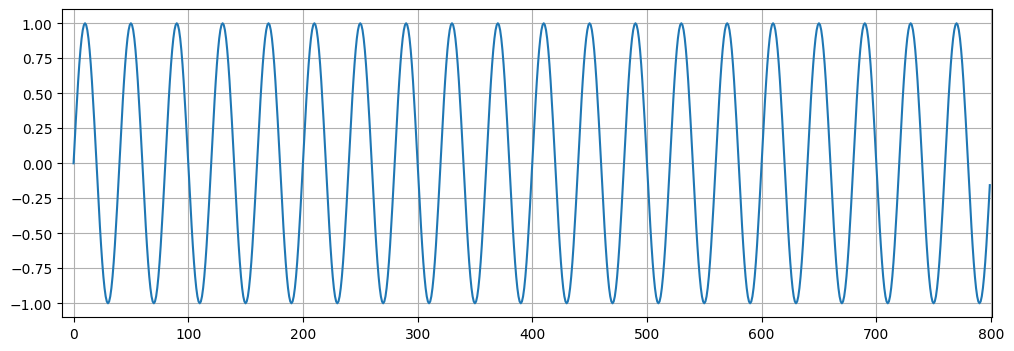

In [2]:
x = torch.linspace(0,799,steps=800)
y = torch.sin(x*2*3.1416/40)
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(y.numpy())

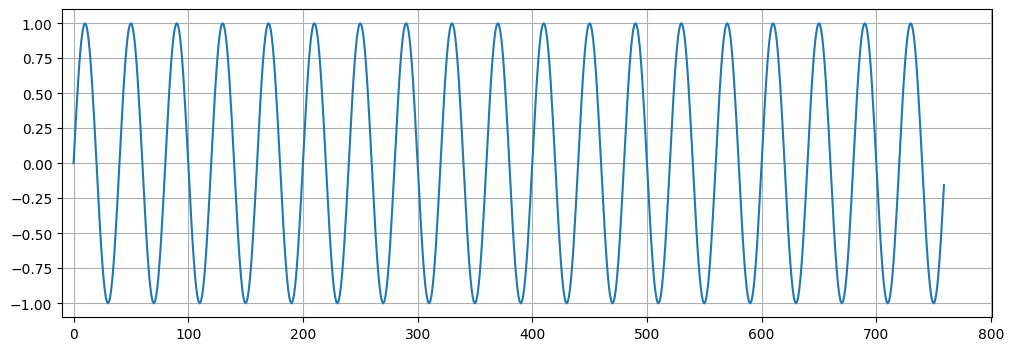

In [3]:
test_size = 40
train_set = y[:-test_size]
test_set = y[-test_size:]

plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(train_set.numpy())

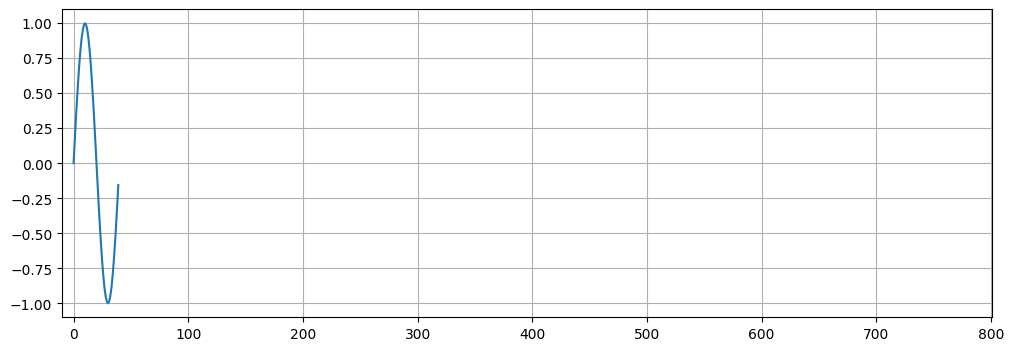

In [4]:
plt.figure(figsize=(12,4))
plt.xlim(-10,801)
plt.grid(True)
plt.plot(test_set.numpy())

In [5]:
#small batch of training data
def input_data(seq,ws):
  out = [] #([0,1,2,3],[4]),([1,2,3,4],[5])
  L = len(seq)
  for i in range(L-ws):
    window = seq[i:i+ws]
    label = seq[i+ws:i+ws+1]
    out.append((window,label))
  return out

In [6]:
window_size = 40
training_data = input_data(train_set,window_size)

In [7]:
len(training_data)

720

In [8]:
class LSTM(nn.Module):

  def __init__(self,input_size=1,hidden_size=50,out_size=1):
    super().__init__()
    self.hidden_size = hidden_size

            # Add an LSTM layer:
    self.lstm = nn.LSTM(input_size,hidden_size)

        # Add a fully-connected layer:
    self.linear = nn.Linear(hidden_size,out_size)

        # Initialize h0 and c0:
    self.hidden = (torch.zeros(1,1,hidden_size),
                       torch.zeros(1,1,hidden_size))

    def forward(self,seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        pred = self.linear(lstm_out.view(len(seq),-1))
        return pred[-1]   # we only care about the last prediction

torch.manual_seed(42)
model = LSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

model

LSTM(
  (lstm): LSTM(1, 50)
  (linear): Linear(in_features=50, out_features=1, bias=True)
)

In [9]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

count_parameters(model)

   200
 10000
   200
   200
    50
     1
______
 10651
